<a href="https://colab.research.google.com/github/SabinSapota/SabinSapota/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix data set**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Distribution of Content Ratings on netflix**

In [ ]:
#making dataset
df.rating.value_counts(dropna=False)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
#filling missing value with orthers
df.rating=df.rating.fillna('orthers')

In [ ]:
px.pie(values=df.rating.value_counts(dropna=False),
       names=df.rating.value_counts(dropna=False).index,
      title='Distribution of Content Ratings on netflix',hole=0.5)

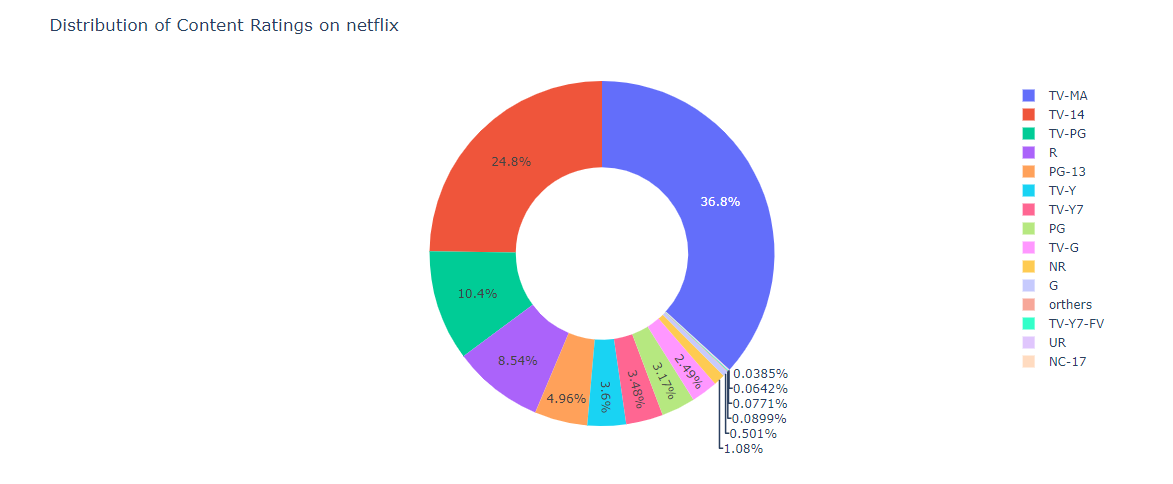

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, 
which means that most of the content available on Netflix is intended for
viewing by mature and adult audiences.

**Top 10 directors on netflix**

In [ ]:
# looking for the na value 
df.director.value_counts(dropna=False)

NaN                            2389
Raúl Campos, Jan Suter           18
Marcus Raboy                     16
Jay Karas                        14
Cathy Garcia-Molina              13
                               ... 
Younuts!                          1
Ringo Lam                         1
James Foley                       1
Fluvio Iannuci, Roly Santos       1
Paco Aguilar                      1
Name: director, Length: 4050, dtype: int64

In [ ]:
df.director=df.director.fillna('Not provided')

In [ ]:
df_dir=df.director.value_counts()[1:11].reset_index()
df_dir.columns=['Director_name','total_number']
df_dir

,Director_name,total_number
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
5,Jay Chapman,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Quentin Tarantino,8


In [ ]:
df.director.value_counts()[:11]

Not provided              2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Quentin Tarantino            8
Name: director, dtype: int64

In [ ]:
df['director']=df['director'].fillna('No Director Specified')
filtered_directors=df['director'].str.split(',',expand=True).stack()

#filtered_directors=filtered_directors.to_frame()
df_dir=filtered_directors.value_counts().reset_index()
df_dir.columns=['Name','Total_content']
df_dir=df_dir[1:11]
df_dir

,Name,Total_content
1,Raúl Campos,18
2,Jan Suter,18
3,Marcus Raboy,16
4,Jay Karas,15
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Martin Scorsese,12
8,Youssef Chahine,12
9,Steven Spielberg,10
10,David Dhawan,9


In [ ]:
px.bar(df_dir,x='Name',y='Total_content',text='Total_content',
      title='Top 10 Directors on Netflix')

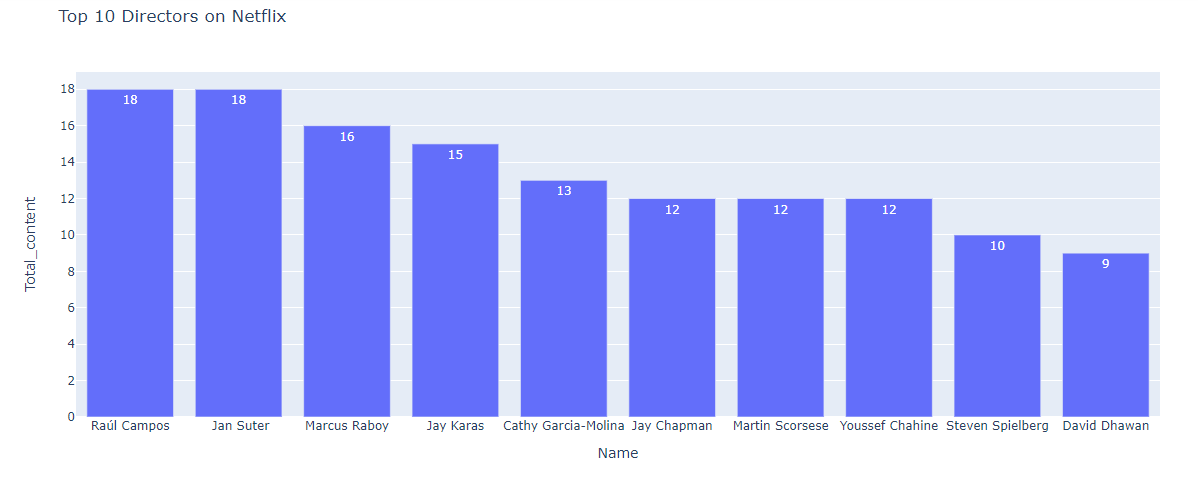

So, from above bar diagram , we can see Raul Campos and jan suter are the best directors in Netflix

**Top 10 successful actors on this platform**

In [ ]:

df_cast=df.cast.str.split(',',expand=True).stack()
df_cast=df_cast.value_counts().reset_index()
df_cast.columns=['Actors Name','Total_content']
df_cast=df_cast[:10]
df_cast=df_cast.sort_values(by='Total_content', ascending=True)

In [ ]:
px.bar(df_cast,x='Actors Name',y='Total_content',text='Total_content',
       title='Top 10 actors on Netflix')

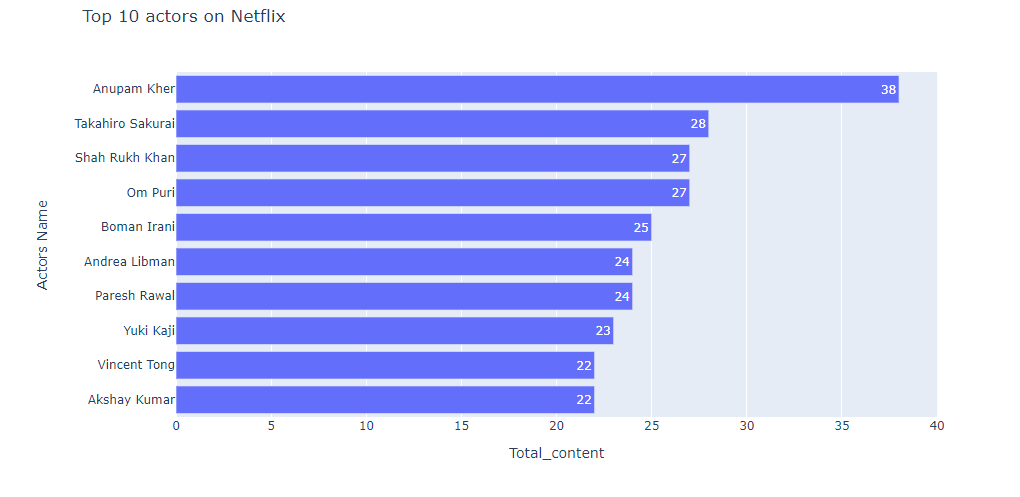

From above bardiagram, Anupam kher is the fammous actor in Netflix

**Trend of content produced over the years on Netflix**

In [ ]:
df1=df.groupby('release_year')['type'].agg('count').sort_values()


df1

release_year
1925       1
1966       1
1959       1
1947       1
1964       1
        ... 
2020     868
2016     882
2019     996
2017    1012
2018    1121
Name: type, Length: 73, dtype: int64

In [ ]:
df1=df[['type','release_year']]
#'df1.groupby('release_year')['type'].agg('count').sort_values(ascending=False)
df1

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008
...,...,...
7782,Movie,2005
7783,Movie,2015
7784,Movie,2019
7785,TV Show,2019


In [ ]:
df2=df1.groupby(['release_year','type']).size().reset_index(name='Total Content')
df2.sort_values(by='Total Content',ascending=False)
df3=df2[df2.release_year>=2010]
df3


,release_year,type,Total Content
94,2010,Movie,136
95,2010,TV Show,37
96,2011,Movie,127
97,2011,TV Show,39
98,2012,Movie,158
99,2012,TV Show,61
100,2013,Movie,202
101,2013,TV Show,65
102,2014,Movie,244
103,2014,TV Show,90


In [ ]:
fig=px.line(df3,x='release_year',y='Total Content',color='type',text='Total Content',
       title='Trend of content produced over the years on Netflix')
fig.update_traces(textposition='top center')
fig.show()

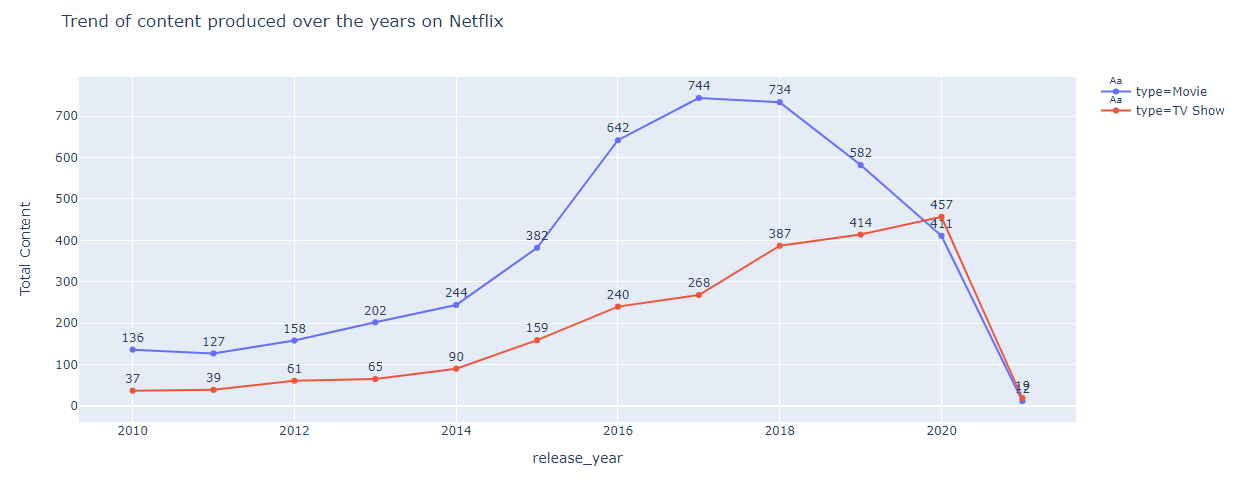

The above line graph shows that there has been a decline in the production of the content
for both movies and other shows since 2018

**Sentiment Analysis**

In [ ]:
from textblob import TextBlob
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", 
              color="Sentiment", title="Sentiment of content on Netflix",text='Total Content')
fig4.show()

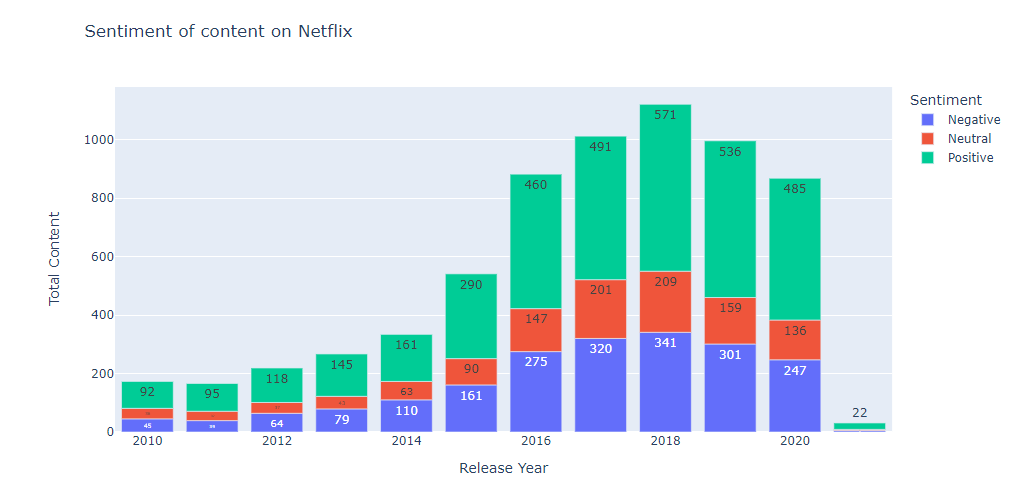

So the above graph shows that the overall positive content is always greater than the neutral and 
negative content combined